In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/doubanmovieshortcomments/DMSC.csv
/kaggle/input/stopwords/stopwords.txt


#### 1、使用豆瓣电影评论数据完成文本分类处理：文本预处理，加载、构建词典。（评论得分1～2	表示negative取值：0，评论得分4～5代表positive取值：1）
https://www.kaggle.com/datasets/utmhikari/doubanmovieshortcomments

In [2]:
import csv
import jieba
import pickle

In [3]:
# 加载停用词
stopwords = [line.strip() for line in open('/kaggle/input/stopwords/stopwords.txt', 'r', encoding='utf-8')] + ['PAD']

In [4]:
# 进行分词
comments_list = []
with open('/kaggle/input/doubanmovieshortcomments/DMSC.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        comment = row['Comment'].strip()
        star = row['Star'].strip()
        if (not comment) or (not star):continue
        star = int(star)
        if star <= 2:
            words = jieba.lcut(comment)
            comments_list.append(([item for item in words if item not in stopwords], 0))
        elif star >= 4:
            words = jieba.lcut(comment)
            comments_list.append(([item for item in words if item not in stopwords], 1))
        
print(len(comments_list)) # 1650495

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.813 seconds.
Prefix dict has been built successfully.


1650495


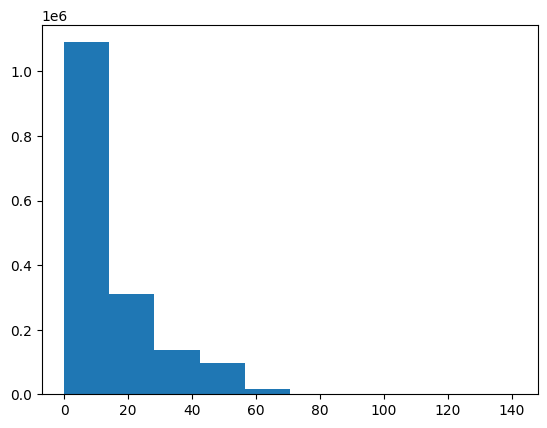

In [5]:
# 查看数据分布
import matplotlib.pyplot as plt

comments_len = [len(c) for c,s in comments_list]
plt.hist(comments_len, bins=10)
plt.show()

In [6]:
# 取分词长度5-100的评论
comments_list = [c for c in comments_list if len(c[0]) in range(5, 100)]
print(len(comments_list)) # 1220249
# 保存分词结果
with open('comments_list.pkl', 'wb') as f:
    pickle.dump(comments_list, f)

1220249


In [7]:
# 构建词典
vocab = {}
word_set = set()
for comment, _ in comments_list:
    word_set.update(comment)
word_list = ['PAD', 'UNK'] + list(word_set)
vocab = {word: i for i, word in enumerate(word_list)}
print(len(vocab)) # 278670
# 保存词典
with open('vocab.pkl', 'wb') as f:
    pickle.dump(vocab, f)

278670
